<a href="https://colab.research.google.com/github/ciepielajan/SDA_SMOG_Wawelski/blob/main/LinRegHTML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression

# from google.colab import files
# uploaded = files.upload()

Saving ex1data2.txt to ex1data2.txt


In [ ]:
data = pd.read_csv('ex1data2.txt', header=None)
data.head()

,0,1,2
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [ ]:
data.columns =(['Size','Bedroom','Price'])
data.head()

,Size,Bedroom,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [ ]:
data.drop('Bedroom', axis=1, inplace=True)
data.head()

,Size,Price
0,2104,399900
1,1600,329900
2,2400,369000
3,1416,232000
4,3000,539900


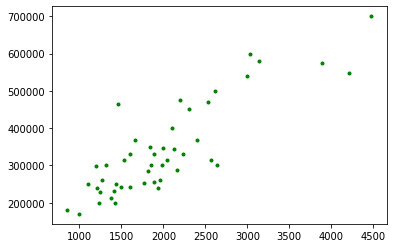

In [ ]:
plt.plot(data.Size, data.Price, 'g.')
plt.show()

In [ ]:
data.corr()

,Size,Price
Size,1.000000,0.854988
Price,0.854988,1.000000


In [ ]:
# h - hipoteza przewidywanej wartosci y tutaj y = ax + b
#  h(x) = teta1 * x1 + teta0
#  teta1 = a slope, teta0 = b intercept, 
# self.X czylu x0, x1 - zmienna niezalezna cecha, x0 = 1
# self.y czyli y - cel, zmienna zalezna badana
# self.p czli p to parameters - a = theta1 slope, b = theta0 intercept
# self.a to learning rate
# self.c to cost koszt


In [ ]:
class LinearModel():
  def __init__(self, features, target):
    self.X = features
    self.y = target
  def GradDesc(self, parameters, learningRate, cost):
        self.a = learningRate
        self.c = cost
        self.p = parameters
        return self.a, self.Cost(self.c), self.p
    
  def Cost(self,c):
        if c =='RMSE':
            return self.y
        elif c == 'MSE':
            return self.X
            
            
X=1
y=0

a = LinearModel(5,4)
print(a.GradDesc(2,0.01,'MSE'))
print(a.Cost('RMSE')) 


(0.01, 5, 2)
4


In [ ]:
X = np.array(data.drop('Price',axis=1))
y = np.array(data.Price)
m = len(data)

print(X.shape)
print(y.shape)
print(m)

(47, 1)
(47,)
47


In [ ]:
y = y.reshape((m,1))
print(y.shape)

(47, 1)


In [ ]:
def normscaler(Z, normal=False, scale='max'): 
    Zn = np.zeros(Z.shape)
    for col in range(Zn.shape[1]):
        std = Z[:,col].std()
        clm = Z[:,col]
        mn = Z[:,col].mean()
        mx = Z[:,col].max()
        nrm = 0
        sclr = 1
        if normal:
            nrm = mn
        if scale =='max':
            sclr = mx
        elif scale == 'std':
            sclr = std
        Zn[:,col] = (clm-nrm)/sclr
        
    return Zn
    
Xn = normscaler(X, normal=True, scale='std')
yn = normscaler(y, normal=True, scale='std')


array([[ 0.48089023],
       [-0.08498338],
       [ 0.23109745],
       [-0.87639804],
       [ 1.61263744],
       [-0.32750064],
       [-0.20624201],
       [-1.1431751 ],
       [-1.03807621],
       [-0.791517  ],
       [-0.81173485],
       [ 0.05325146],
       [-0.08418307],
       [ 2.90606282],
       [-0.65085698],
       [ 0.88508566],
       [-0.32750064],
       [-1.1358915 ],
       [ 1.29007331],
       [ 2.09039644],
       [-0.70744435],
       [-0.69046814],
       [-0.78828343],
       [-0.65085698],
       [ 1.88749033],
       [-0.73169607],
       [ 1.00311072],
       [ 1.03948831],
       [ 1.08799176],
       [-0.32750064],
       [ 0.07669479],
       [-1.37840876],
       [-0.20624201],
       [ 1.93599378],
       [-0.44067536],
       [-0.73169607],
       [-0.89337424],
       [ 0.03708364],
       [ 1.686201  ],
       [-0.43178306],
       [ 0.22705549],
       [-0.08498338],
       [-0.21351753],
       [-0.33477616],
       [-1.29756968],
       [-0

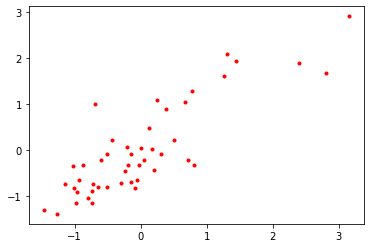

In [ ]:
plt.plot(Xn, yn, 'r.')
plt.show()

In [ ]:
# parameter initialization
theta = np.array([0.9,-1])

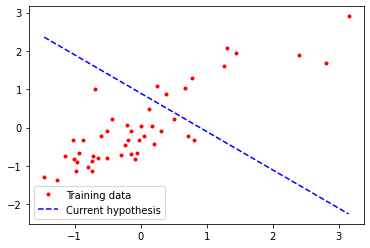

In [ ]:
lineX = np.linspace(Xn.min(), Xn.max(), 100)
liney = [theta[0] + theta[1]*x for x in lineX]

plt.plot(Xn,yn,'r.', label='Training data')
plt.plot(lineX,liney,'b--', label='Current hypothesis')
plt.legend()
plt.show()

In [ ]:
def cost_function(X, y, theta, deriv=False):
    z = np.ones((len(X),1))
    X = np.append(z, X, axis=1)
    
    if deriv:
        loss     = X.dot(theta)-y
        gradient = X.T.dot(loss)/len(X)
        return gradient, loss
        
    else:
        h = X.dot(theta)
        j = (h-y.flatten())
        J = j.dot(j)/2/(len(X))
        return J
    
cost_function(Xn, yn, theta)

2.2599875928781255

In [ ]:
def GradDescent(features, target, param, learnRate=0.01, multiple=1, batch=len(X), log=False):

    iterations = batch*len(features)
    epochs     = iterations*multiple
    y          = target.flatten()
    t          = param
    b          = batch
    a          = learnRate
    
    theta_history  = np.zeros((param.shape[0],epochs)).T
    cost_history   = [0]*epochs
    
    for ix in range(epochs):
        
        i    = epochs%len(X)
        cost = cost_function(features[i:i+b], y[i:i+b], t)

        cost_history[ix]   = cost
        theta_history[ix]  = t

        g, l = cost_function(features[i:i+b], y[i:i+b], t, deriv=True)
        t    = t-a*g
        
        if log:
            if ix%250==0:
                print("iteration :", ix+1)
                #print("\tloss     = ", l)
                print("\tgradient = ", g)
                print("\trate     = ", a*g)
                print("\ttheta    = ", t)
                print("\tcost     = ", cost)
            
    return cost_history, theta_history

alpha = 0.01
mul = 10
bat = 8
ch, th = GradDescent(Xn,yn,theta,alpha,mul,bat,log=False)
print(th)

[[ 0.9        -1.        ]
 [ 0.88975023 -0.98988138]
 [ 0.87961164 -0.97981694]
 ...
 [ 0.05461629  1.09394879]
 [ 0.05461629  1.09394879]
 [ 0.05461629  1.09394879]]


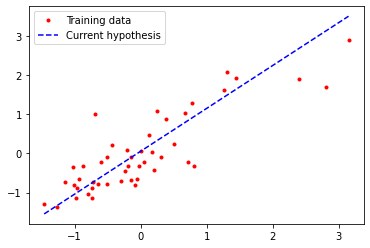

In [ ]:
lineX = np.linspace(Xn.min(), Xn.max(), 100)
liney = [th[-1,0] + th[-1,1]*xx for xx in lineX]

plt.plot(Xn,yn,'r.', label='Training data')
plt.plot(lineX,liney,'b--', label='Current hypothesis')
plt.legend()
plt.show()

In [ ]:
#Grid over which we will calculate J
theta0_vals = np.linspace(-2, 2, 100)
theta1_vals = np.linspace(-2, 3, 100)

#initialize J_vals to a matrix of 0's
J_vals = np.zeros((theta0_vals.size, theta1_vals.size))

#Fill out J_vals
for t1, element in enumerate(theta0_vals):
    for t2, element2 in enumerate(theta1_vals):
        thetaT = np.zeros(shape=(2, 1))
        thetaT[0][0] = element
        thetaT[1][0] = element2
        J_vals[t1, t2] = cost_function(Xn, yn, thetaT.flatten())

#Contour plot
J_vals = J_vals.T

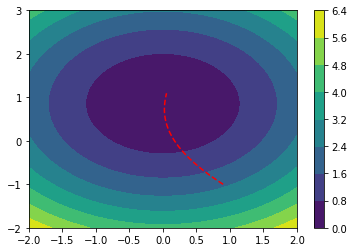

In [ ]:
A, B = np.meshgrid(theta0_vals, theta1_vals)
C = J_vals

cp = plt.contourf(A, B, C)
plt.colorbar(cp)
plt.plot(th.T[0],th.T[1],'r--')
plt.show()

In [ ]:
#Animation
import matplotlib.animation as animation

#Set the plot up,
fig = plt.figure(figsize=(12,5))

plt.subplot(121)
plt.plot(Xn,yn,'ro', label='Training data')
plt.title('Housing Price Prediction')
plt.axis([Xn.min()-Xn.std(),Xn.max()+Xn.std(),yn.min()-yn.std(),yn.max()+yn.std()])
plt.grid(axis='both')
plt.xlabel("Size of house in ft^2 (X1) ")
plt.ylabel("Price in $1000s (Y)")
plt.legend(loc='lower right')

line, = plt.plot([], [], 'b-', label='Current Hypothesis')
annotation = plt.text(-2, 3,'',fontsize=20,color='green')
annotation.set_animated(True)

plt.subplot(122)
cp = plt.contourf(A, B, C)
plt.colorbar(cp)
plt.title('Filled Contours Plot')
plt.xlabel('theta 0')
plt.ylabel('theta 1')
track, = plt.plot([], [], 'r-')
point, = plt.plot([], [], 'ro')

plt.tight_layout()
plt.close()

#Generate the animation data,
def init():
    line.set_data([], [])
    track.set_data([], [])
    point.set_data([], [])
    annotation.set_text('')
    return line, track, point, annotation

# animation function.  This is called sequentially
def animate(i):
    fit1_X = np.linspace(Xn.min()-Xn.std(), Xn.max()+Xn.std(), 1000)
    fit1_y = th[i][0] + th[i][1]*fit1_X
    
    fit2_X = th.T[0][:i]
    fit2_y = th.T[1][:i]
    
    track.set_data(fit2_X, fit2_y)
    line.set_data(fit1_X, fit1_y)
    point.set_data(th.T[0][i], th.T[1][i])
    
    annotation.set_text('Cost = %.4f' %(ch[i]))
    return line, track, point, annotation

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=800, interval=0, blit=True)

# anim.save('animation.gif', writer='imagemagick', fps = 30)


In [ ]:
import io
import base64
from IPython.display import HTML

filename = 'animation.gif'

video = io.open(filename, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<img src="data:image/gif;base64,{0}" type="gif" />'''.format(encoded.decode('ascii')))


FileNotFoundError: ignored